In [52]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import pickle
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [49]:
#Function to calculate adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [7]:
boston=load_boston()  # Loading boston dataset
print(boston.keys())
print(boston.DESCR)
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
bos['Price']=boston.target
bos.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
bos.shape

(506, 14)

In [9]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
bos.isna().sum()  # Checking for null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [11]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
bos.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price      229
dtype: int64

<Figure size 2160x2520 with 0 Axes>

Text(0.5, 0, 'CRIM')

Text(0.5, 0, 'ZN')

Text(0.5, 0, 'INDUS')

Text(0.5, 0, 'CHAS')

Text(0.5, 0, 'NOX')

Text(0.5, 0, 'RM')

Text(0.5, 0, 'AGE')

Text(0.5, 0, 'DIS')

Text(0.5, 0, 'RAD')

Text(0.5, 0, 'TAX')

Text(0.5, 0, 'PTRATIO')

Text(0.5, 0, 'B')

Text(0.5, 0, 'LSTAT')

Text(0.5, 0, 'Price')

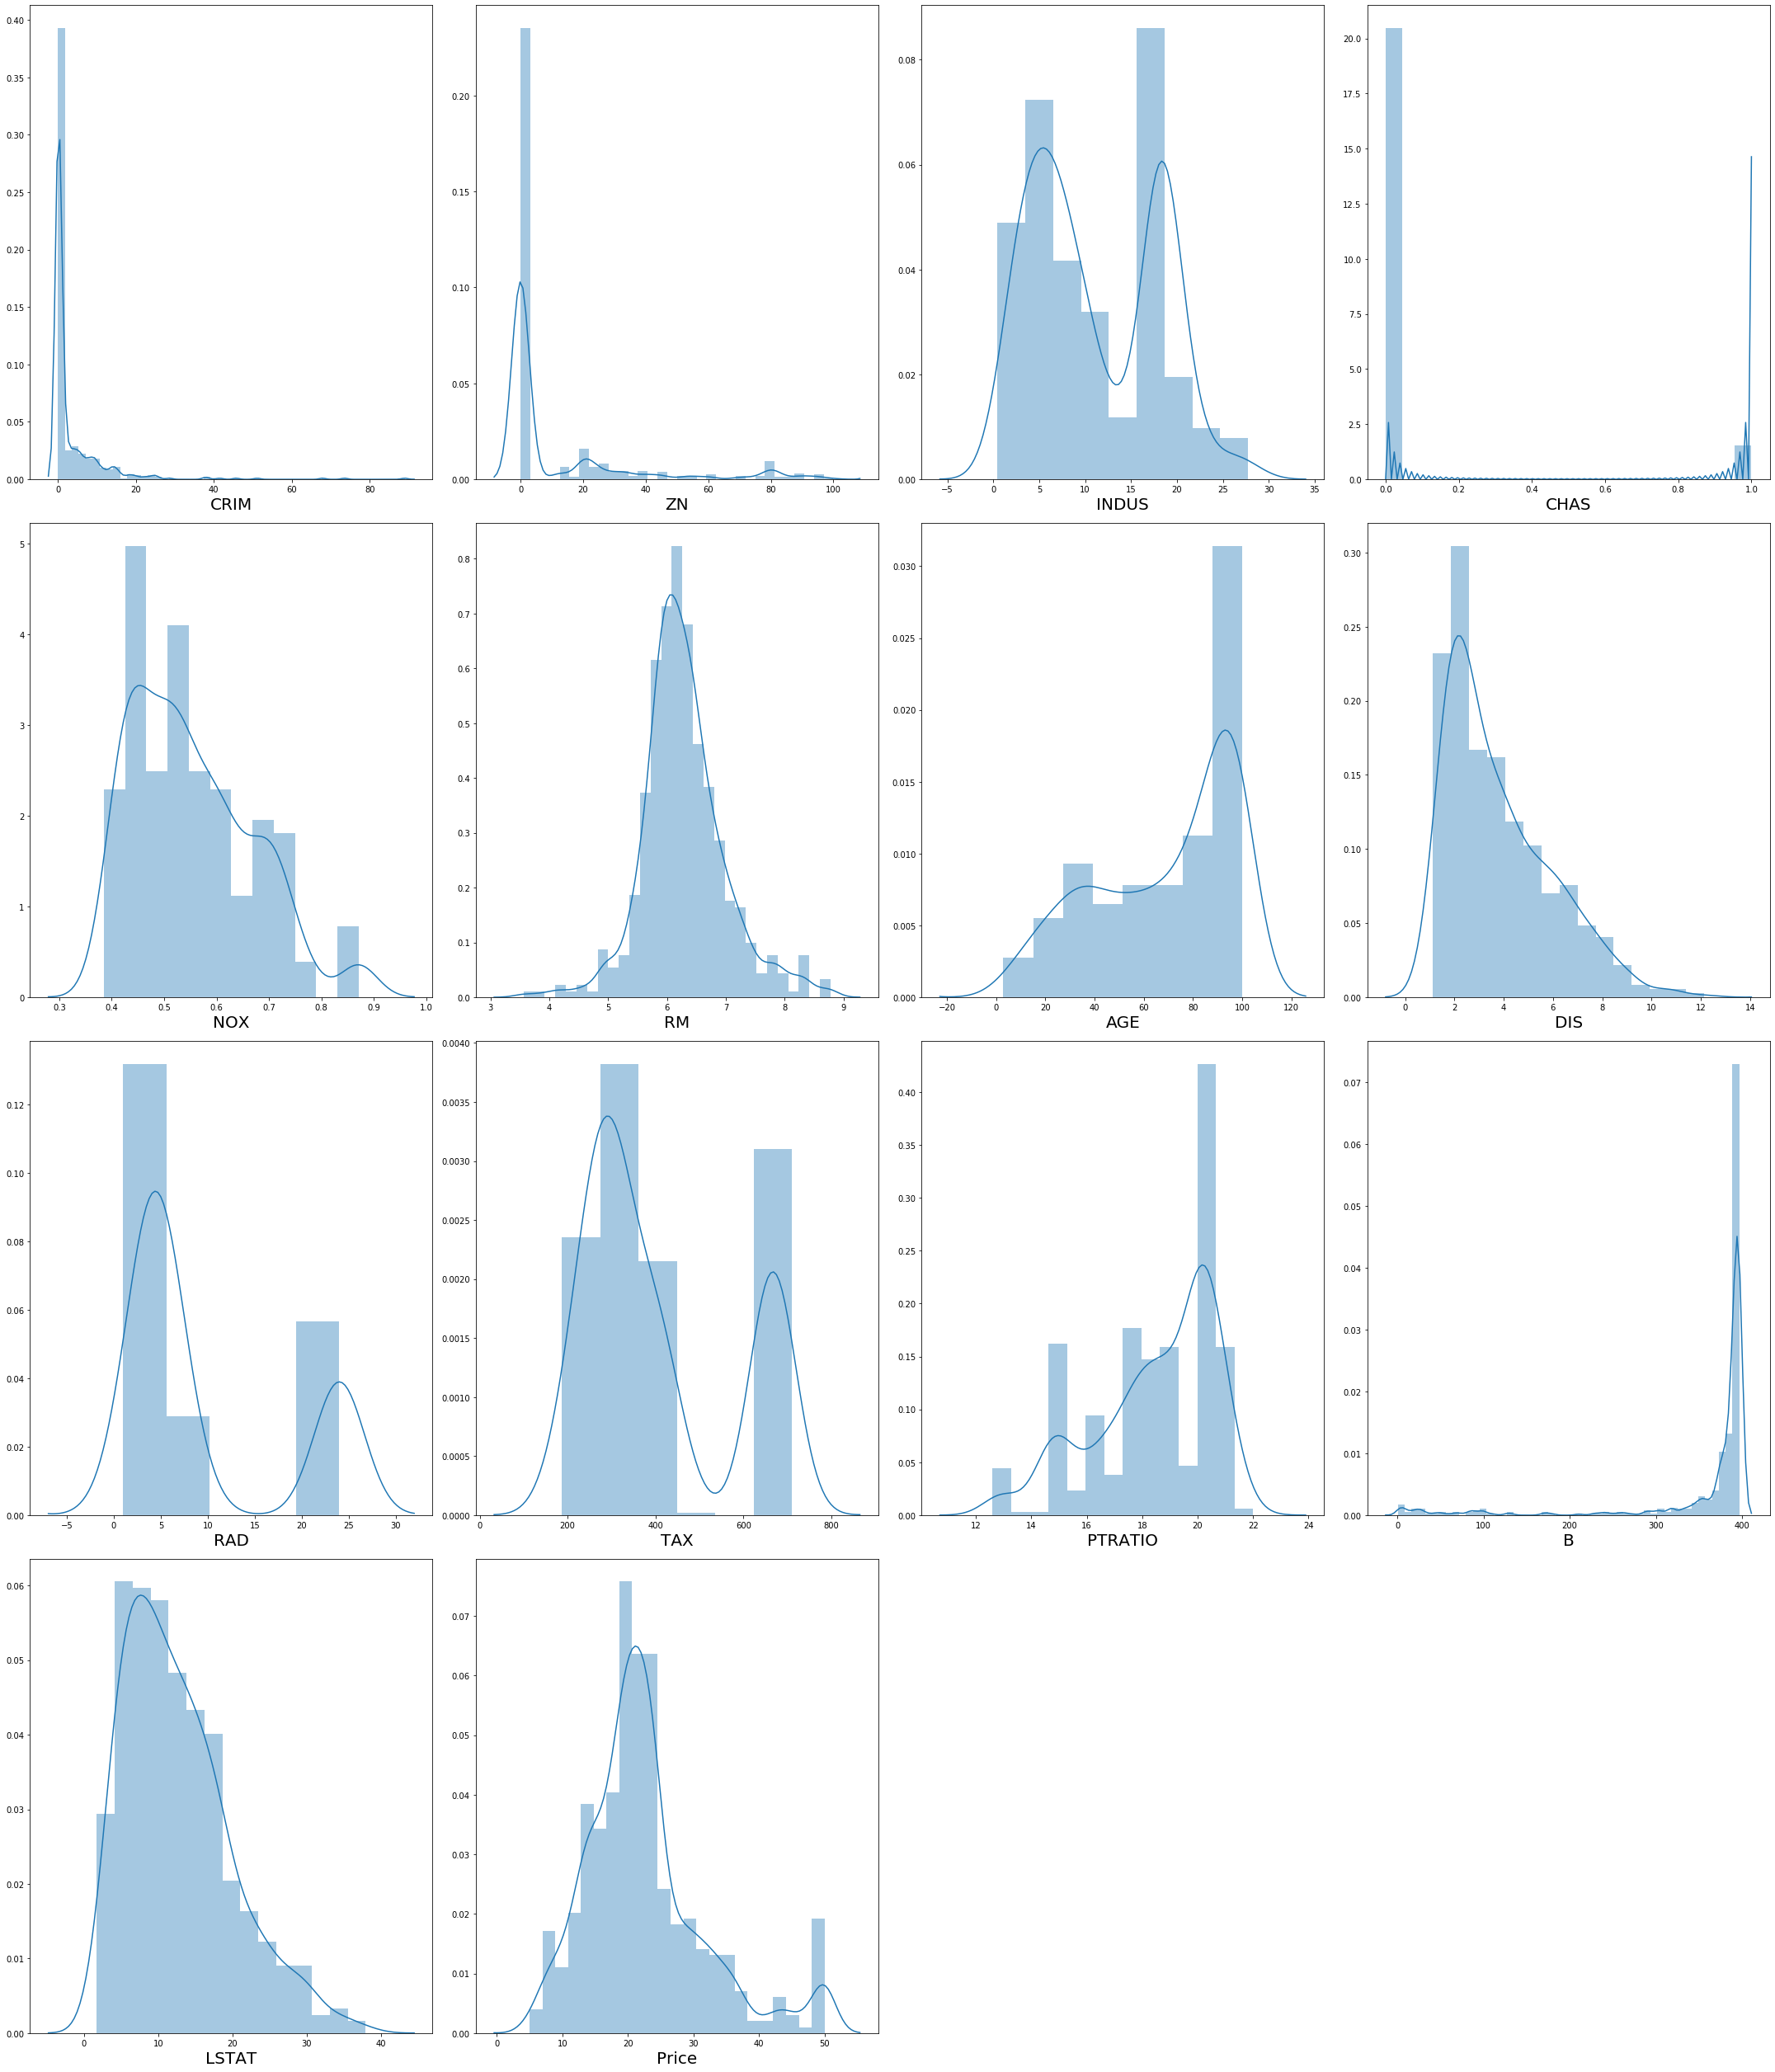

In [13]:
# Plot the distributions of both features and Target

plt.figure(figsize=(30,35),facecolor='white')
plotnumber=1
for column in bos:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<Figure size 1440x720 with 0 Axes>

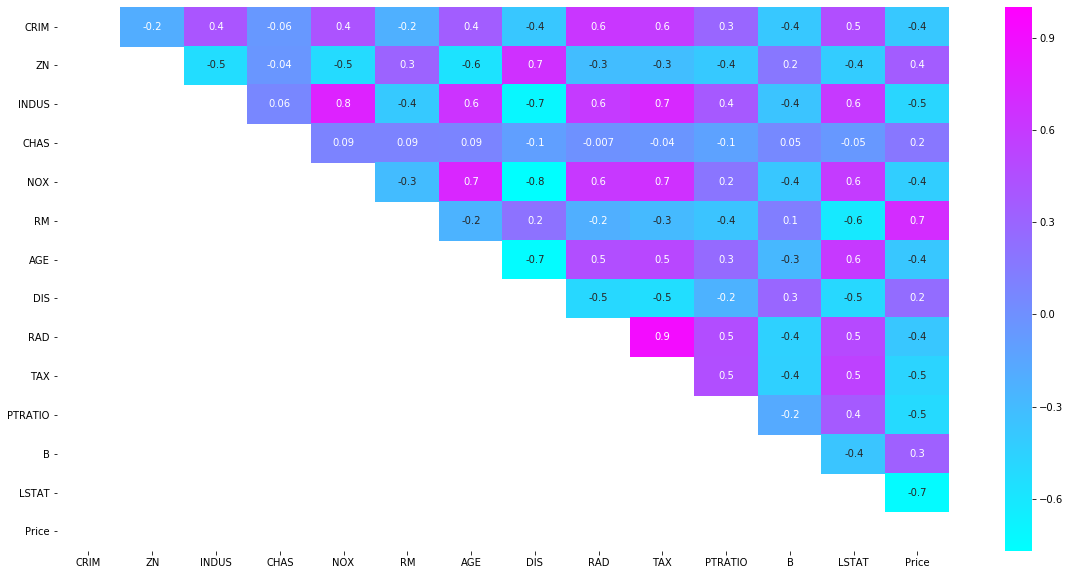

In [14]:
# plotting the correlation heatmap to tnow 1)the correlation between feature and target columns 2)Multicolinearity

mask=np.tril(bos.corr())
plt.figure(figsize=(20,10))
sns.heatmap(bos.corr(),cmap='cool',annot=True,fmt='.1g',mask=mask)

#### From the above heatmap, we can clearly see that the feature ' RM ' has a positive correlation and feature 'LSTAT' has negative correlation with Target ' Price'

Text(0.5, 0, 'RM')

Text(0, 0.5, 'Price')

Text(0.5, 0, 'LSTAT')

Text(0, 0.5, 'Price')

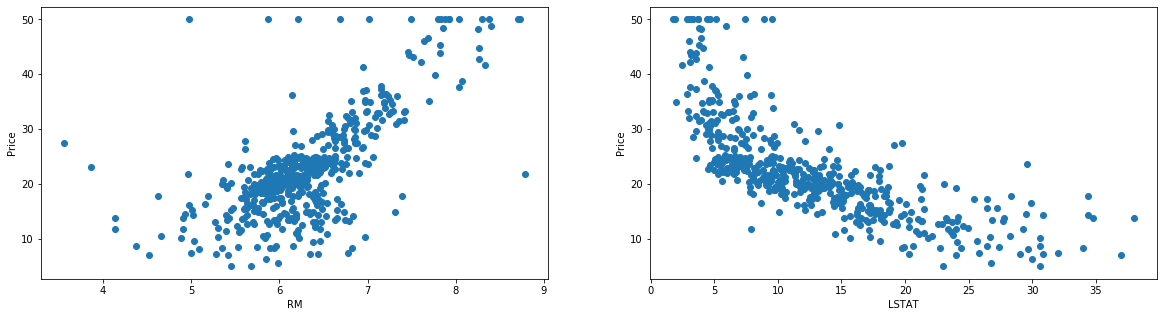

In [15]:
# plotting scatterplot to see the linear relationship that exist between feature and target columns.

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(x=bos['RM'],y=bos['Price'])
ax2.scatter(x=bos['LSTAT'],y=bos['Price'])
ax1.set_xlabel('RM')
ax1.set_ylabel('Price')
ax2.set_xlabel('LSTAT')
ax2.set_ylabel('Price')

####  from the above scatter plots,we can also clearly see that there is some linear relationship between features ' RM, LSTAT ' and target ' Price '

In [16]:
# Seperating feature and target columns

X=bos.drop(columns = ['Price'],axis=1)
Y=bos['Price']

In [78]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [18]:
# Calculating variance inflation factor of feature variables to check for multicolinearity.

variables=X_scaled
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables,i) for i in range(X_scaled.shape[1])]
vif['Features']=X.columns
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


#### a VIF value greater than 5 means a very severe multicollinearity.The VIF values of RAD and TAX are greater than 5 and the above heatmap also confirms this,so we need to remove one of the colums.

In [19]:
X=bos.drop(columns=['RAD','Price'],axis=1)
X_scaled=scaler.fit_transform(X)

In [20]:
# splitting our data into train and test sets

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=355)

In [24]:
regression=LinearRegression() 
regression.fit(X_train,Y_train)  # fitting the model to the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
filename='linear_regression_model.pickle'
pickle.dump(regression,open(filename,'wb'))  # saving the model to the local file system

In [42]:
loaded_model=pickle.load(open(filename,'rb'))
Y_predicted=loaded_model.predict(X_test)  # prediction using the saved model


In [45]:
regression.score(X_train,Y_train)

0.7222635507593164

In [40]:
adj_r2(X_train,Y_train)

0.7131574376694578

#### Our r2 score is 72.22% and adj r2 is 71.31% for our training set, so looks like we are not being penalized by use of any feature.

In [50]:
regression.score(X_test,Y_test)

0.7330599172441089

In [51]:
adj_r2(X_test,Y_test)

0.7049609611645414

#### So it looks like our model r2 score is less on the test data. Let's see if our model is overfitting our training data using regularization.

In [63]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations

lasscv=LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lasscv.fit(X_train,Y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [64]:
alpha=lasscv.alpha_
alpha

0.005913224207167832

In [65]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=0.005913224207167832, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
lasso_reg.score(X_test,Y_test)

0.7331135446799194

#### our r2_score for test data (73.31%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [67]:
# Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas=np.random.uniform(low=0,high=10,size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(X_train,Y_train)

C:\Users\Chaitanya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([3.24874582, 0.55715092, 9.12283141, 5.1958081 , 8.18078084,
       9.57669807, 9.82352026, 1.40343172, 9.8438455 , 4.75699722,
       7.74055232, 0.97349945, 8.11208517, 8.07560873, 7.53373907,
       0.77310789, 5.30742892, 1.35028783, 5.42381293, 9.24560205,
       5.32419098, 9.20648038, 4.7163117 , 2.36286168, 9.66195733,
       1.0957557 , 2.39200043, 3.66548255, 0.45625117, 8.86967177,
       9.52852873, 5.86029244, 0.8140912 , 9.78828653, 8.88920037,
       0.80085304, 8.89880962, 2.33887443, 0.17394296, 4.85762194,
       3.2739588 , 9.26513563, 4.73591582, 0.75625232, 4.80888339,
       1.3895332 , 1.96207328, 2.98848621, 0.14689729, 5.67075287]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [69]:
best_alpha=ridgecv.alpha_

In [71]:
ridge_reg=Ridge(alpha=best_alpha)
ridge_reg.fit(X_train,Y_train)

Ridge(alpha=0.14689728914451194, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
ridge_reg.score(X_test,Y_test)

0.7330413495048602

#### we got the same r2 score using Ridge regression as well. So, it's safe to say there is no overfitting.

In [73]:
# Elastic net

elasticcv=ElasticNetCV(alphas=None,cv=10)
elasticcv.fit(X_train,Y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [74]:
elasticcv.alpha_

0.08122804400292312

In [75]:
elasticcv.l1_ratio

0.5

In [76]:
elasticnet_reg=ElasticNet(alpha=elasticcv.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train,Y_train)

ElasticNet(alpha=0.08122804400292312, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [77]:
elasticnet_reg.score(X_test,Y_test)

0.7295335048358528

#### So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.